<a href="https://colab.research.google.com/github/Krishnabavesh/Field_fix/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


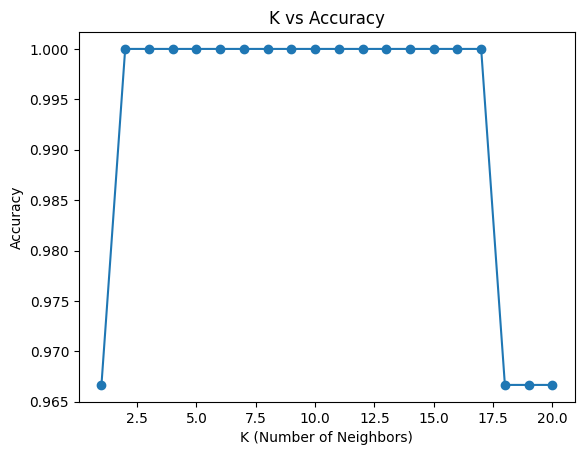

Best K = 2 with accuracy = 1.00
Final Accuracy: 1.0


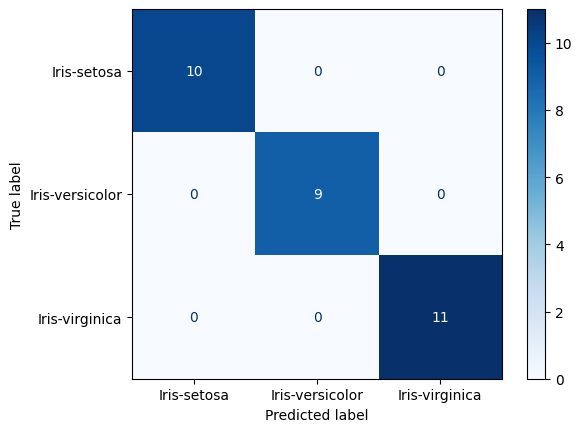

/tmp/ipython-input-1002344040.py:87: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=[list(knn_plot.classes_).index(i) for i in y_test_p],


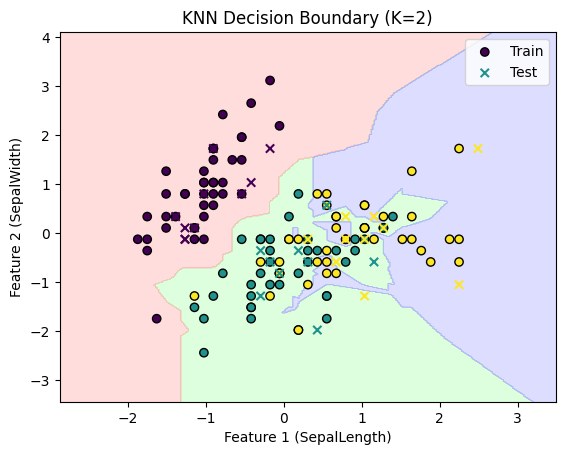

In [2]:
# Task 6: K-Nearest Neighbors (KNN) Classification

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load dataset
df = pd.read_csv("/content/Iris.csv")   # Upload Iris.csv in Colab
print(df.head())

# Step 3: Select features (X) and target (y)
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Train KNN model with different K values
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

# Step 7: Train final model with best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K = {best_k} with accuracy = {max(accuracies):.2f}")

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Step 8: Evaluate model
acc = accuracy_score(y_test, y_pred_final)
print("Final Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred_final, labels=knn_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_final.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Step 9: Visualize decision boundaries (using only 2 features for plotting)
from matplotlib.colors import ListedColormap

X_plot = X_scaled[:, :2]  # take first two features
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_plot, y, test_size=0.2, random_state=42
)

knn_plot = KNeighborsClassifier(n_neighbors=best_k)
knn_plot.fit(X_train_p, y_train_p)

# Meshgrid for decision boundary
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([list(knn_plot.classes_).index(i) for i in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_train_p[:, 0], X_train_p[:, 1], c=[list(knn_plot.classes_).index(i) for i in y_train_p],
            edgecolor='k', marker='o', label='Train')
plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=[list(knn_plot.classes_).index(i) for i in y_test_p],
            edgecolor='k', marker='x', label='Test')
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel("Feature 1 (SepalLength)")
plt.ylabel("Feature 2 (SepalWidth)")
plt.legend()
plt.show()